## TO FIND CLUSTERS - (CUSTOMER SEGMENTATION PROJECT)

In [1]:
# Importing Libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action="ignore")

In [2]:
# Loading Dataset
df = pd.read_csv("Sample - Superstore Sales (Excel).csv",encoding='ANSI')

In [3]:
# Top 10 records of the dataset
df.head(10)

,Row ID,Order ID,Order Date,Month Year,Order Priority,Order Quantity,Sales,Customer Name,Province,Region,Product Category,Product Sub-Category,Product Name
0,1,3,10/13/2010,10-01-2010,Low,6,261.5400,Muhammed MacIntyre,Nunavut,Nunavut,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum"
1,49,293,10-01-2012,10-01-2012,High,49,10123.0200,Barry French,Nunavut,Nunavut,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera..."
2,50,293,10-01-2012,10-01-2012,High,27,244.5700,Barry French,Nunavut,Nunavut,Office Supplies,Binders and Binder Accessories,"Cardinal Slant-D® Ring Binder, Heavy Gauge Vinyl"
3,80,483,07-10-2011,07-01-2011,High,30,4965.7595,Clay Rozendal,Nunavut,Nunavut,Technology,Telephones and Communication,R380
4,85,515,8/28/2010,08-01-2010,Not Specified,19,394.2700,Carlos Soltero,Nunavut,Nunavut,Office Supplies,Appliances,Holmes HEPA Air Purifier
5,86,515,8/28/2010,08-01-2010,Not Specified,21,146.6900,Carlos Soltero,Nunavut,Nunavut,Furniture,Office Furnishings,G.E. Longer-Life Indoor Recessed Floodlight Bulbs
6,97,613,6/17/2011,06-01-2011,High,12,93.5400,Carl Jackson,Nunavut,Nunavut,Office Supplies,Binders and Binder Accessories,"Angle-D Binders with Locking Rings, Label Holders"
7,98,613,6/17/2011,06-01-2011,High,22,905.0800,Carl Jackson,Nunavut,Nunavut,Office Supplies,Storage & Organization,"SAFCO Mobile Desk Side File, Wire Frame"
8,103,643,3/24/2011,03-01-2011,High,21,2781.8200,Monica Federle,Nunavut,Nunavut,Office Supplies,Storage & Organization,"SAFCO Commercial Wire Shelving, Black"
9,107,678,2/26/2010,02-01-2010,Low,44,228.4100,Dorothy Badders,Nunavut,Nunavut,Office Supplies,Paper,Xerox 198


In [4]:
# Info of the dataset  '''This will give the deatils of each features in the dataset like dtypes no.of.records'''
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8399 entries, 0 to 8398
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Row ID                8399 non-null   int64  
 1   Order ID              8399 non-null   int64  
 2   Order Date            8399 non-null   object 
 3   Month Year            8399 non-null   object 
 4   Order Priority        8399 non-null   object 
 5   Order Quantity        8399 non-null   int64  
 6   Sales                 8399 non-null   float64
 7   Customer Name         8399 non-null   object 
 8   Province              8399 non-null   object 
 9   Region                8399 non-null   object 
 10  Product Category      8399 non-null   object 
 11  Product Sub-Category  8399 non-null   object 
 12  Product Name          8399 non-null   object 
dtypes: float64(1), int64(3), object(9)
memory usage: 853.1+ KB


In [5]:
# description of the numerical Features ( five Point Summary)
df.describe()

,Row ID,Order ID,Order Quantity,Sales
count,8399.000000,8399.000000,8399.000000,8399.000000
mean,4200.000000,29965.179783,25.571735,1775.878179
std,2424.726789,17260.883447,14.481071,3585.050525
min,1.000000,3.000000,1.000000,2.240000
25%,2100.500000,15011.500000,13.000000,143.195000
50%,4200.000000,29857.000000,26.000000,449.420000
75%,6299.500000,44596.000000,38.000000,1709.320000
max,8399.000000,59973.000000,50.000000,89061.050000


In [6]:
# Checking null values in the dataset
df.isnull().sum()/len(df)*100

Row ID                  0.0
Order ID                0.0
Order Date              0.0
Month Year              0.0
Order Priority          0.0
Order Quantity          0.0
Sales                   0.0
Customer Name           0.0
Province                0.0
Region                  0.0
Product Category        0.0
Product Sub-Category    0.0
Product Name            0.0
dtype: float64

In [7]:
# description for Categorical Features
df.describe(include="object").T

,count,unique,top,freq
Order Date,8399,1418,9/15/2011,20
Month Year,8399,48,01-01-2009,223
Order Priority,8399,5,High,1768
Customer Name,8399,795,Darren Budd,41
Province,8399,13,Ontario,1826
Region,8399,8,West,1991
Product Category,8399,3,Office Supplies,4610
Product Sub-Category,8399,17,Paper,1225
Product Name,8399,1263,"Global High-Back Leather Tilter, Burgundy",24


In [8]:
# cleaning the date feature and assign into the correct datatype for further EDA
df["Order Date"] = pd.to_datetime(df["Order Date"].apply(lambda x: "-".join(x.split("/")) if "/" in x else x))
df["Month Year"] = pd.to_datetime(df["Month Year"].apply(lambda x: "-".join(x.split("/")) if "/" in x else x))

In [9]:
# Checking is there any duplicated values in the dataset by unique identifier
df[df["Row ID"].duplicated()]

,Row ID,Order ID,Order Date,Month Year,Order Priority,Order Quantity,Sales,Customer Name,Province,Region,Product Category,Product Sub-Category,Product Name


**Since there is no duplicated values in the dataset**

In [10]:
df["Row ID"].nunique()

8399

In [11]:
# Changing the unique identifying features datatype correctly
df["Order ID"] = df["Order ID"].astype("object")
df["Row ID"] = df["Row ID"].astype("object")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8399 entries, 0 to 8398
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                8399 non-null   object        
 1   Order ID              8399 non-null   object        
 2   Order Date            8399 non-null   datetime64[ns]
 3   Month Year            8399 non-null   datetime64[ns]
 4   Order Priority        8399 non-null   object        
 5   Order Quantity        8399 non-null   int64         
 6   Sales                 8399 non-null   float64       
 7   Customer Name         8399 non-null   object        
 8   Province              8399 non-null   object        
 9   Region                8399 non-null   object        
 10  Product Category      8399 non-null   object        
 11  Product Sub-Category  8399 non-null   object        
 12  Product Name          8399 non-null   object        
dtypes: datetime64[ns](

In [12]:
# Creating a new feature Total by multiplying Order Quantity and sales
df["Total"] = df["Order Quantity"]*df["Sales"]

### Univariate Analysis

**Numerical features**

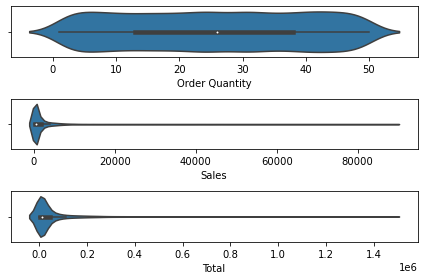

In [13]:
num_cols = df.select_dtypes(include=["int64","float64"]).columns
iterator=1
for i in num_cols:
    
    plt.subplot(3,1,iterator)
    #plt.title(i)
    sns.violinplot(df[i])
    iterator+=1
plt.tight_layout()
plt.show()

**Based On the above plot**
* Sales feature is positively skewed but there are more customers comes between 100 to 2000.Total feature is also skewed because of order quantity is multiplied with sales to create total.

In [14]:
# To check the no of unique categories in each categorical feature
c_columns = df.select_dtypes(include="object").columns
for i in c_columns:
    print(i,";",df[i].nunique())

Row ID ; 8399
Order ID ; 5496
Order Priority ; 5
Customer Name ; 795
Province ; 13
Region ; 8
Product Category ; 3
Product Sub-Category ; 17
Product Name ; 1263


**Categorical features**

In [79]:
plt.rcParams['figure.figsize']=[12,10]

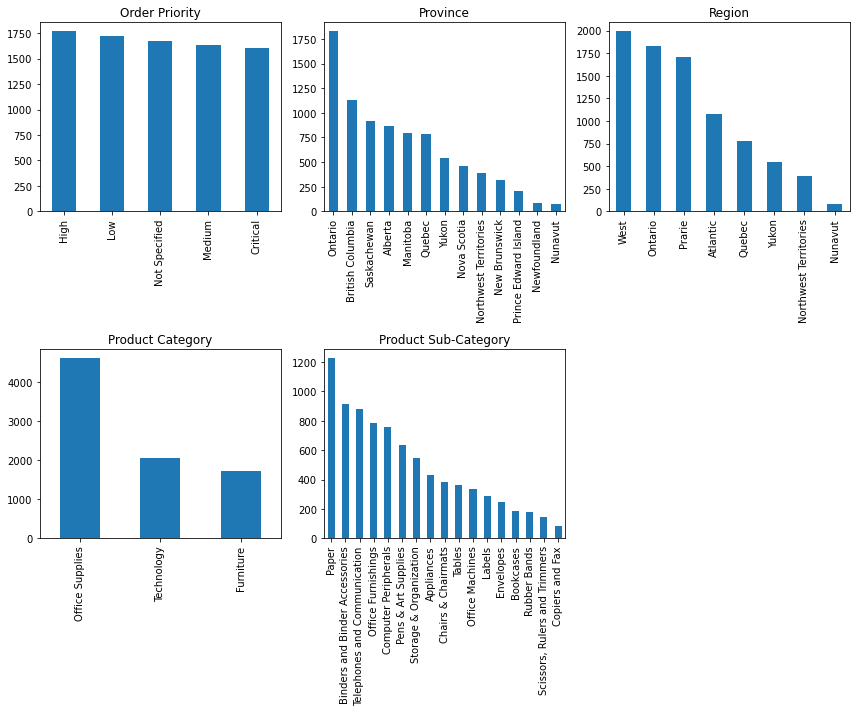

In [15]:
cat_cols1=[ 'Order Priority', 'Province','Region', 
           'Product Category', 'Product Sub-Category']
# Categorical columns
iterator=1
plt.rcParams['figure.figsize']=[12,10]
for i in cat_cols1:
    plt.subplot(2,3,iterator)
    plt.title(i)
    df[i].value_counts().plot(kind='bar')
    iterator+=1
    
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Customer Name'>

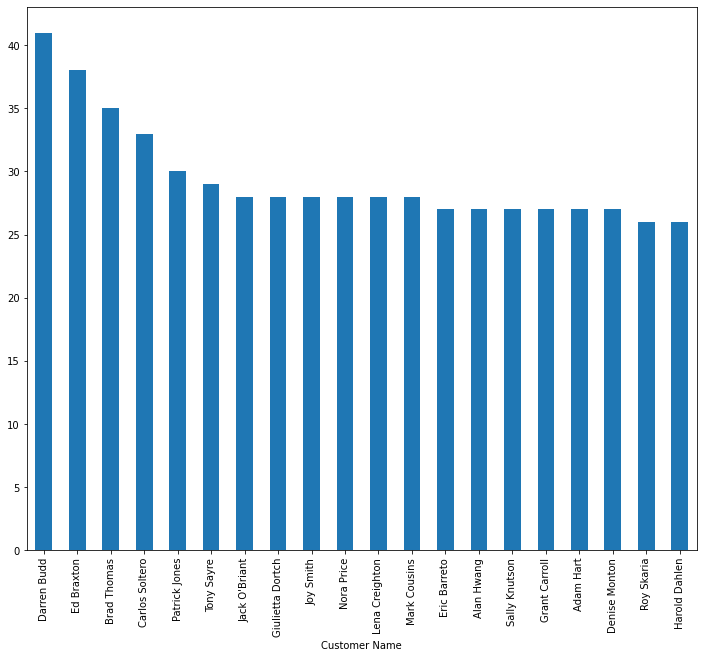

In [16]:
# Plotting top 20 customers based on their total order frequency
df.groupby("Customer Name")["Order ID"].count().sort_values(ascending=False).head(20).plot(kind='bar')

In [17]:
plt.rcParams['figure.figsize'] = [15,20]

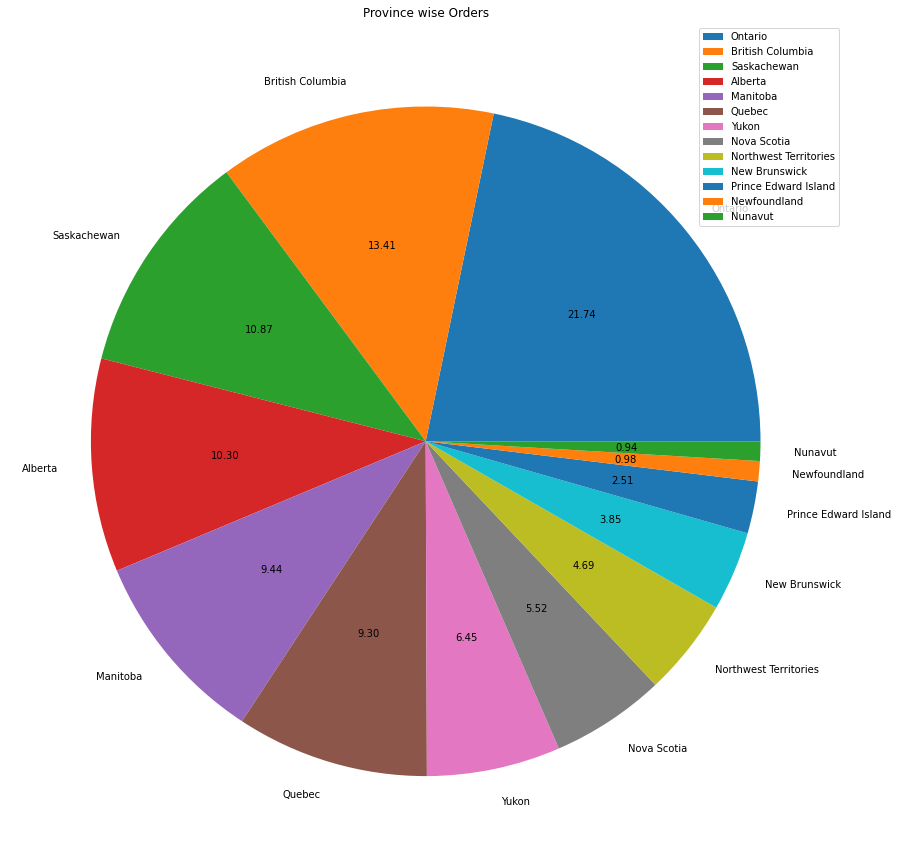

In [18]:
# Province wise the total orders got
plt.pie(df.groupby("Province")["Order ID"].count().sort_values(ascending=False),labels=['Ontario', 'British Columbia', 'Saskachewan', 'Alberta', 'Manitoba',
       'Quebec', 'Yukon', 'Nova Scotia', 'Northwest Territories',
       'New Brunswick', 'Prince Edward Island', 'Newfoundland', 'Nunavut'],autopct='%.2f')
plt.legend()
plt.title("Province wise Orders")
plt.show()

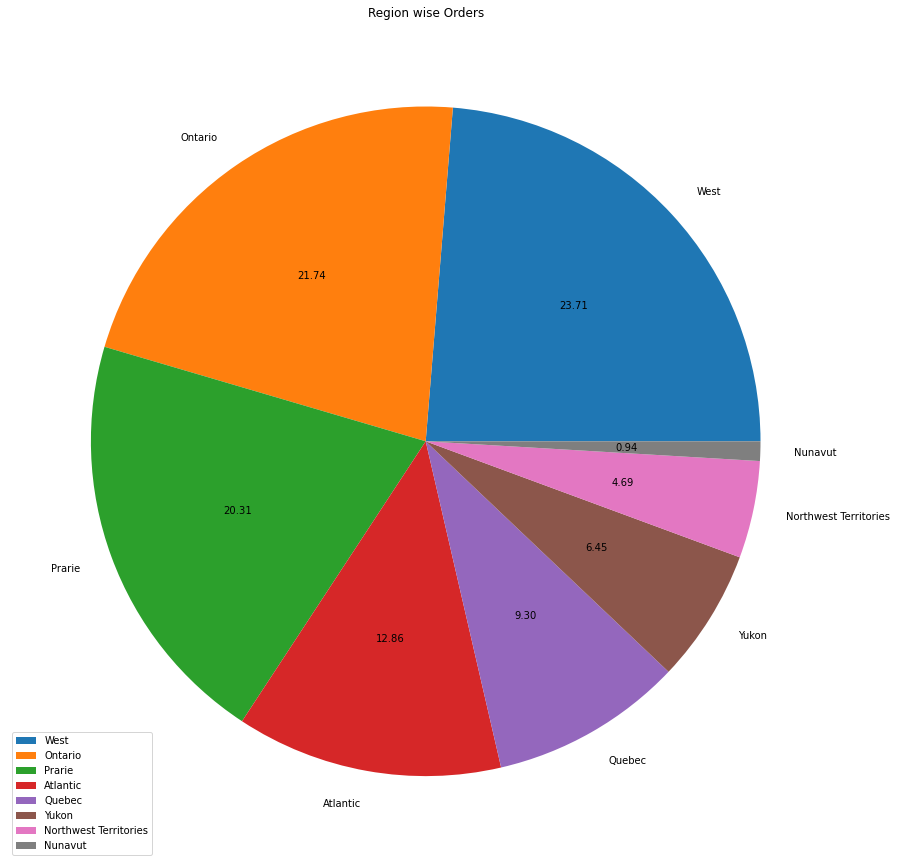

In [19]:
# Region wise total orders assigned
plt.pie(df.groupby("Region")["Order ID"].count().sort_values(ascending=False),labels=['West', 'Ontario', 'Prarie', 'Atlantic', 'Quebec', 'Yukon',
       'Northwest Territories', 'Nunavut'],autopct='%.2f')
plt.legend()
plt.title("Region wise Orders")
plt.show()

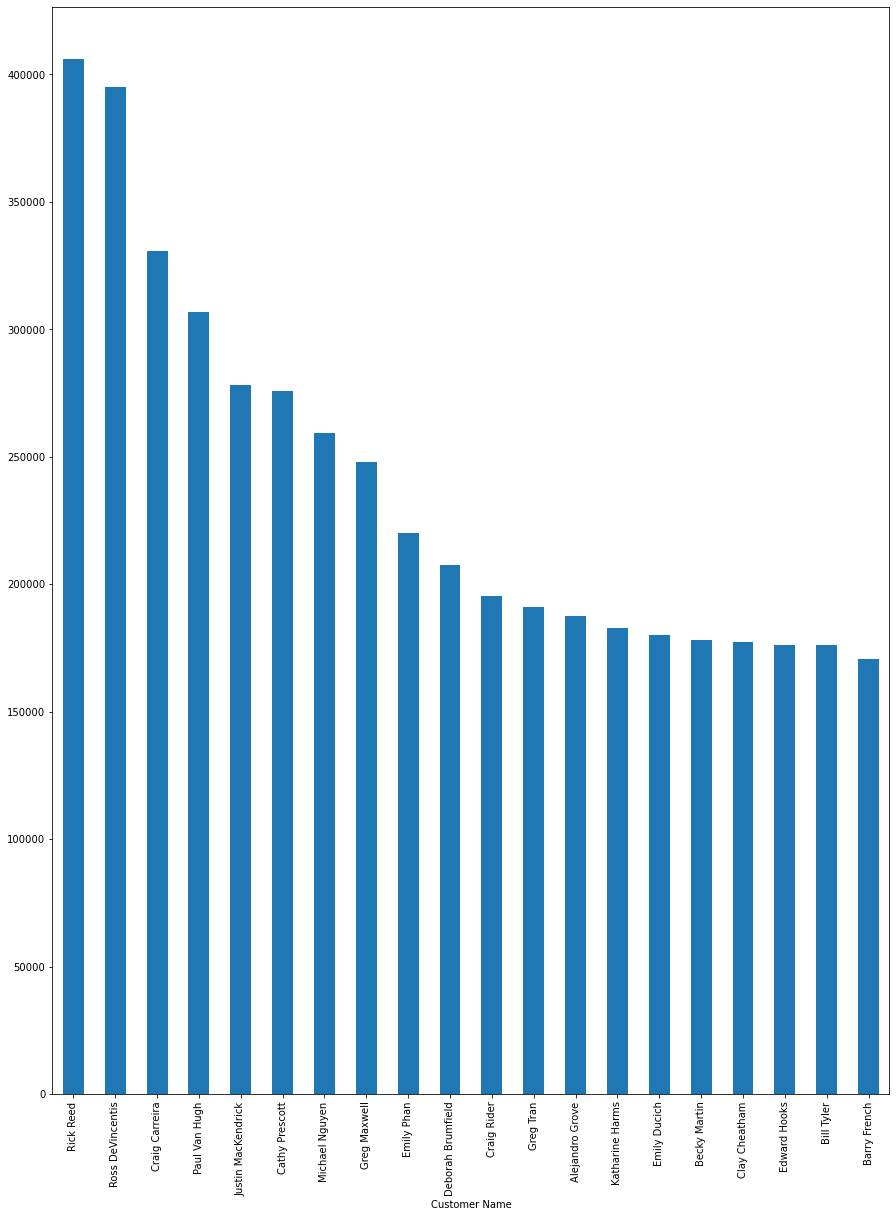

In [20]:
# top 20 customers based on the average amount paid for their orders
df.groupby("Customer Name")["Total"].mean().round(2).sort_values(ascending=False).head(20).plot(kind="bar")
plt.show()

In [21]:
# Count of the products are ordered based on the each product categories
pd.pivot_table(data=df,index="Product Category",values = "Order ID",aggfunc="count").sort_values(by="Order ID",ascending=False)

,Order ID
Product Category,
Office Supplies,4610
Technology,2065
Furniture,1724


In [22]:
# Region wise Category of products ordered count
pd.crosstab(index=df["Region"],columns=df["Product Category"],values=df["Order ID"],aggfunc="count")

Product Category,Furniture,Office Supplies,Technology
Region,,,
Atlantic,229,583,268
Northwest Territories,85,209,100
Nunavut,13,50,16
Ontario,391,998,437
Prarie,321,957,428
Quebec,170,440,171
West,405,1079,507
Yukon,110,294,138


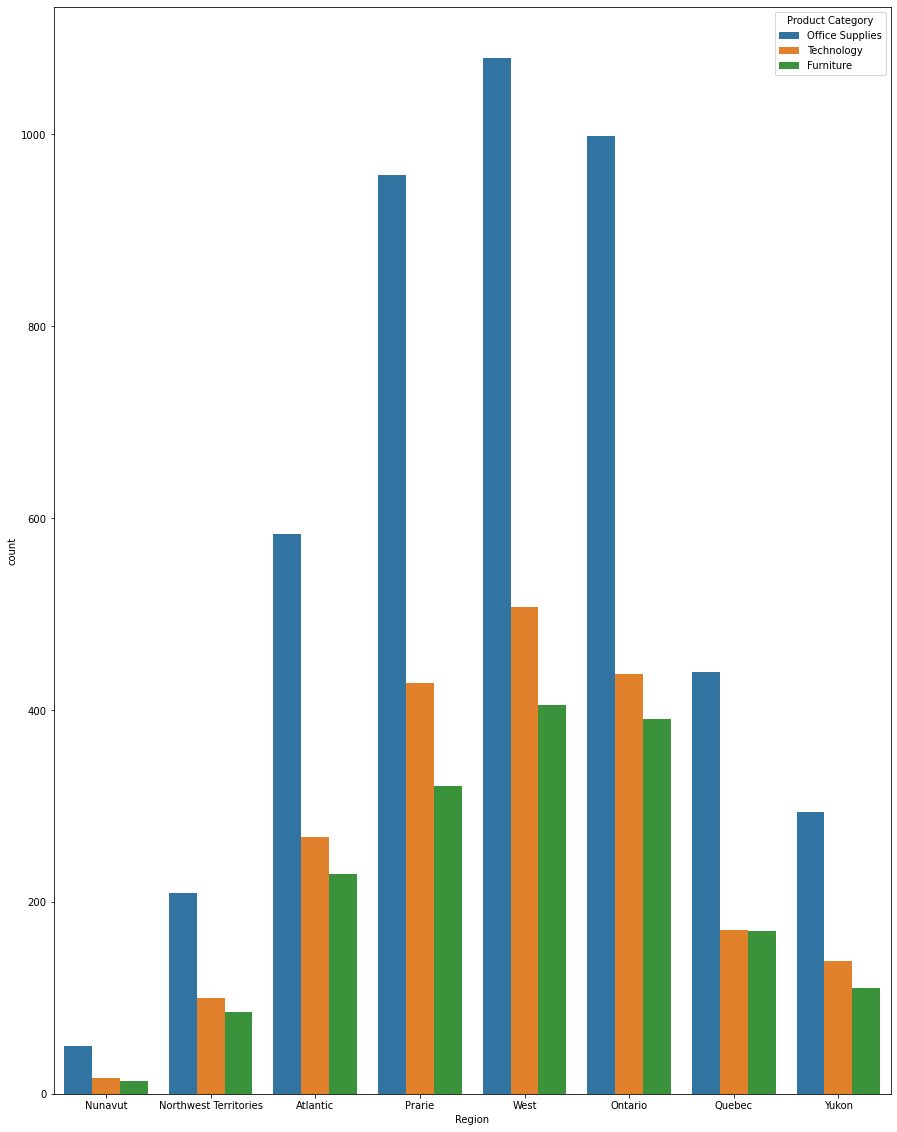

In [23]:
# Above detail in visual form
sns.countplot(df["Region"],hue=df["Product Category"])
plt.show()

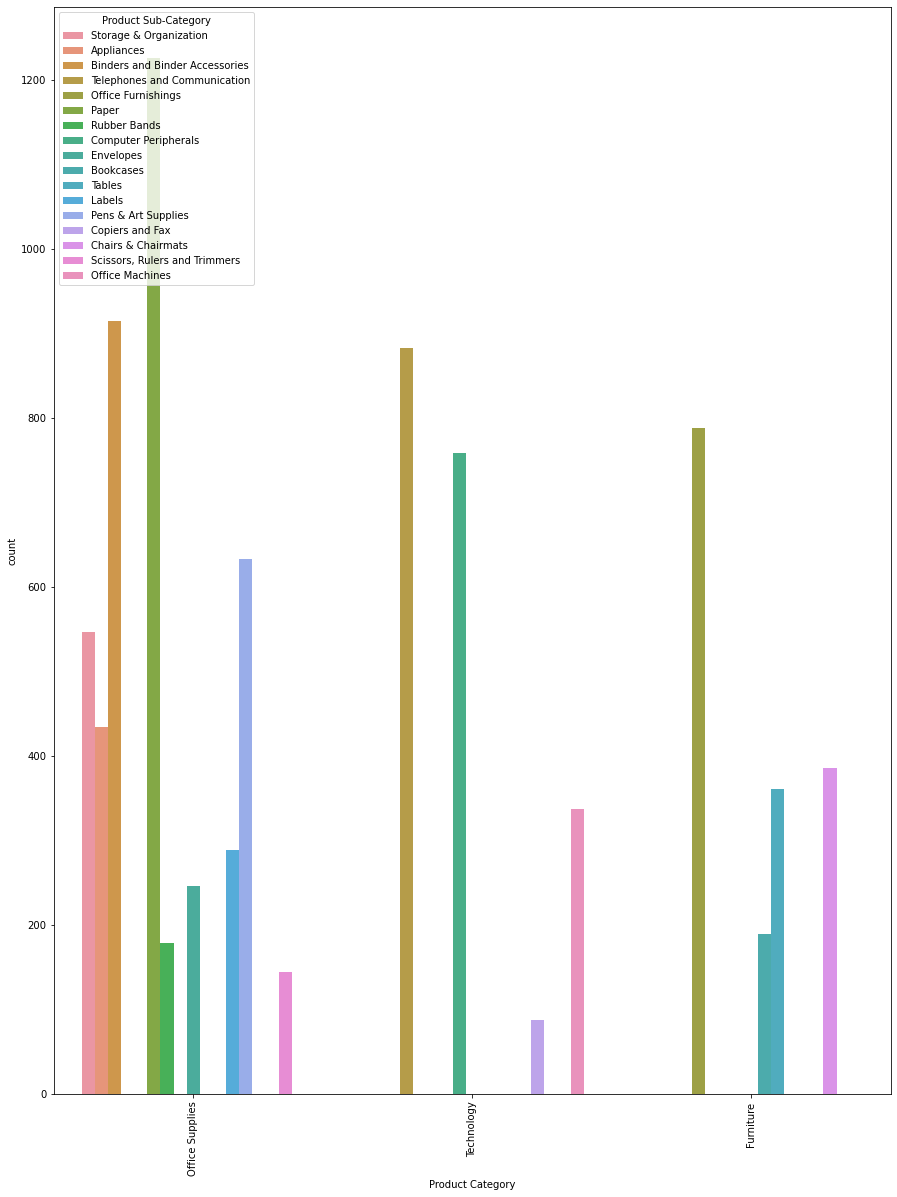

In [24]:
sns.countplot(x=df["Product Category"],hue=df["Product Sub-Category"])
plt.xticks(rotation=90)
plt.show()

In [25]:
# To find in each product category which sub category product is ordered highly
df.groupby(["Product Category","Product Sub-Category"])["Order ID"].count()

Product Category  Product Sub-Category          
Furniture         Bookcases                          189
                  Chairs & Chairmats                 386
                  Office Furnishings                 788
                  Tables                             361
Office Supplies   Appliances                         434
                  Binders and Binder Accessories     915
                  Envelopes                          246
                  Labels                             288
                  Paper                             1225
                  Pens & Art Supplies                633
                  Rubber Bands                       179
                  Scissors, Rulers and Trimmers      144
                  Storage & Organization             546
Technology        Computer Peripherals               758
                  Copiers and Fax                     87
                  Office Machines                    337
                  Telephones and Commun

In [26]:
# to know from which to which year dataset
df["Order Date"].dt.year.unique()

array([2010, 2012, 2011, 2009], dtype=int64)

### Bivariate Analysis

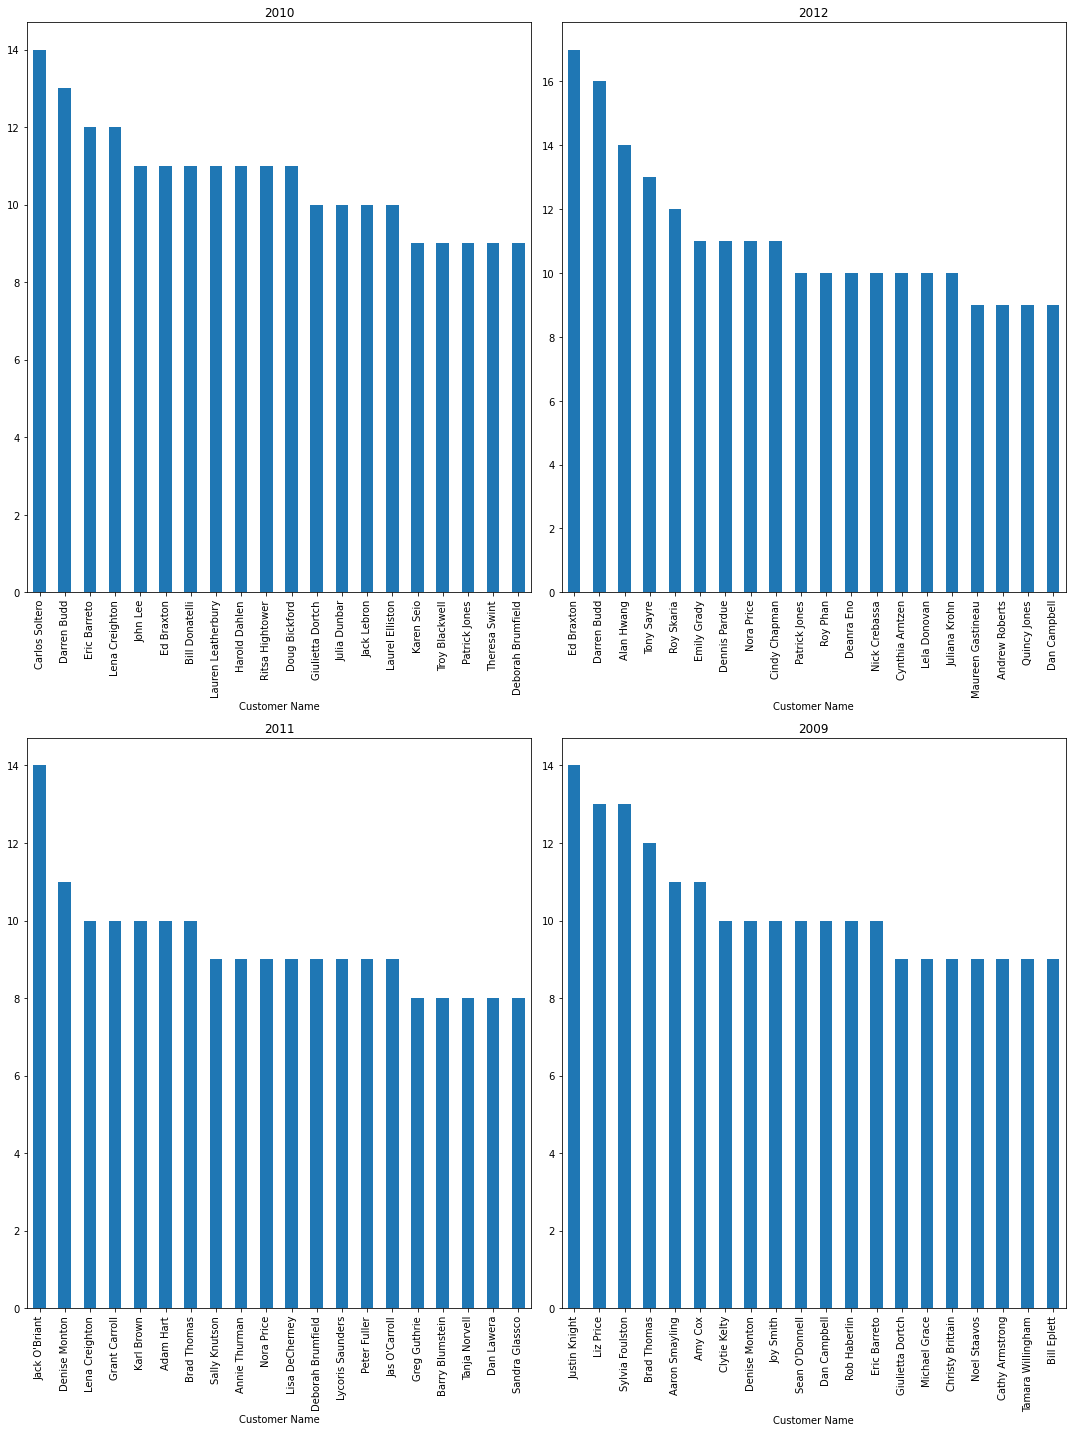

In [27]:
# Using Order date plotting year wise each customers orders count
iterator=1

for i in df["Order Date"].dt.year.unique():
    plt.subplot(2,2,iterator)
    plt.xticks(rotation=90)
    bi_df = df[df["Order Date"].dt.year == i]
    plt.title(i)
    bi_df.groupby("Customer Name")["Order ID"].count().sort_values(ascending=False).head(20).plot(kind="bar")
    iterator+=1
plt.tight_layout()
plt.show()

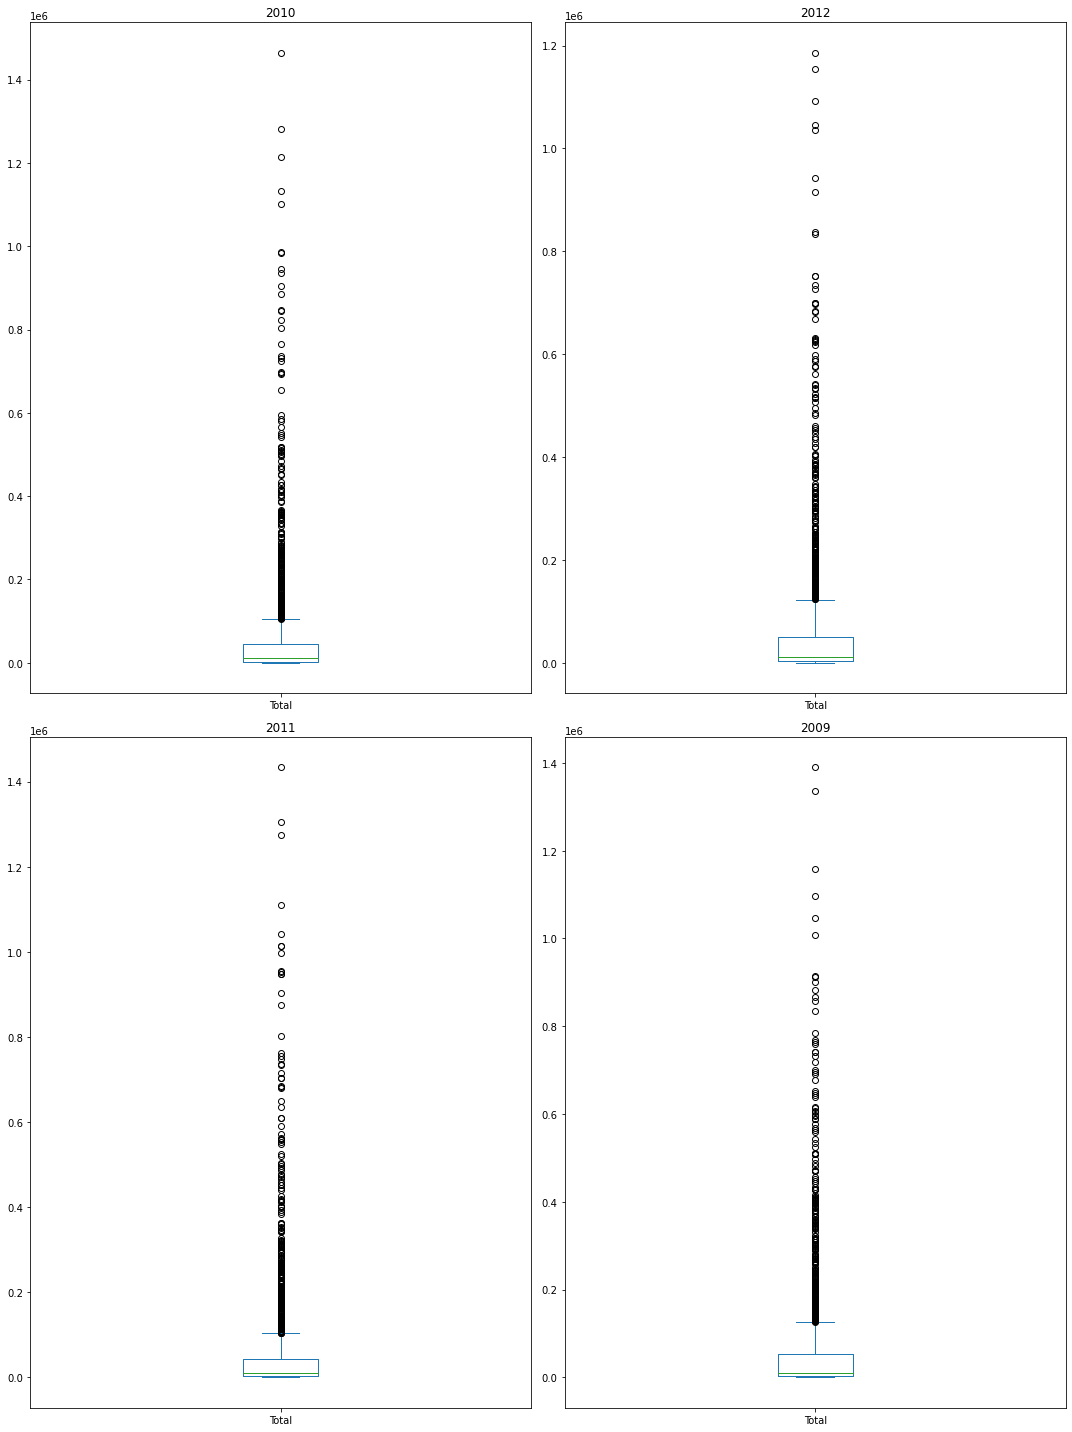

In [28]:
# Year wise total revenue 
iterator=1

for i in df["Order Date"].dt.year.unique():
    plt.subplot(2,2,iterator)
    plt.xticks(rotation=90)
    plt.title(i)
    df[df["Order Date"].dt.year == i]["Total"].plot(kind="box")
    iterator+=1
plt.tight_layout()
plt.show()

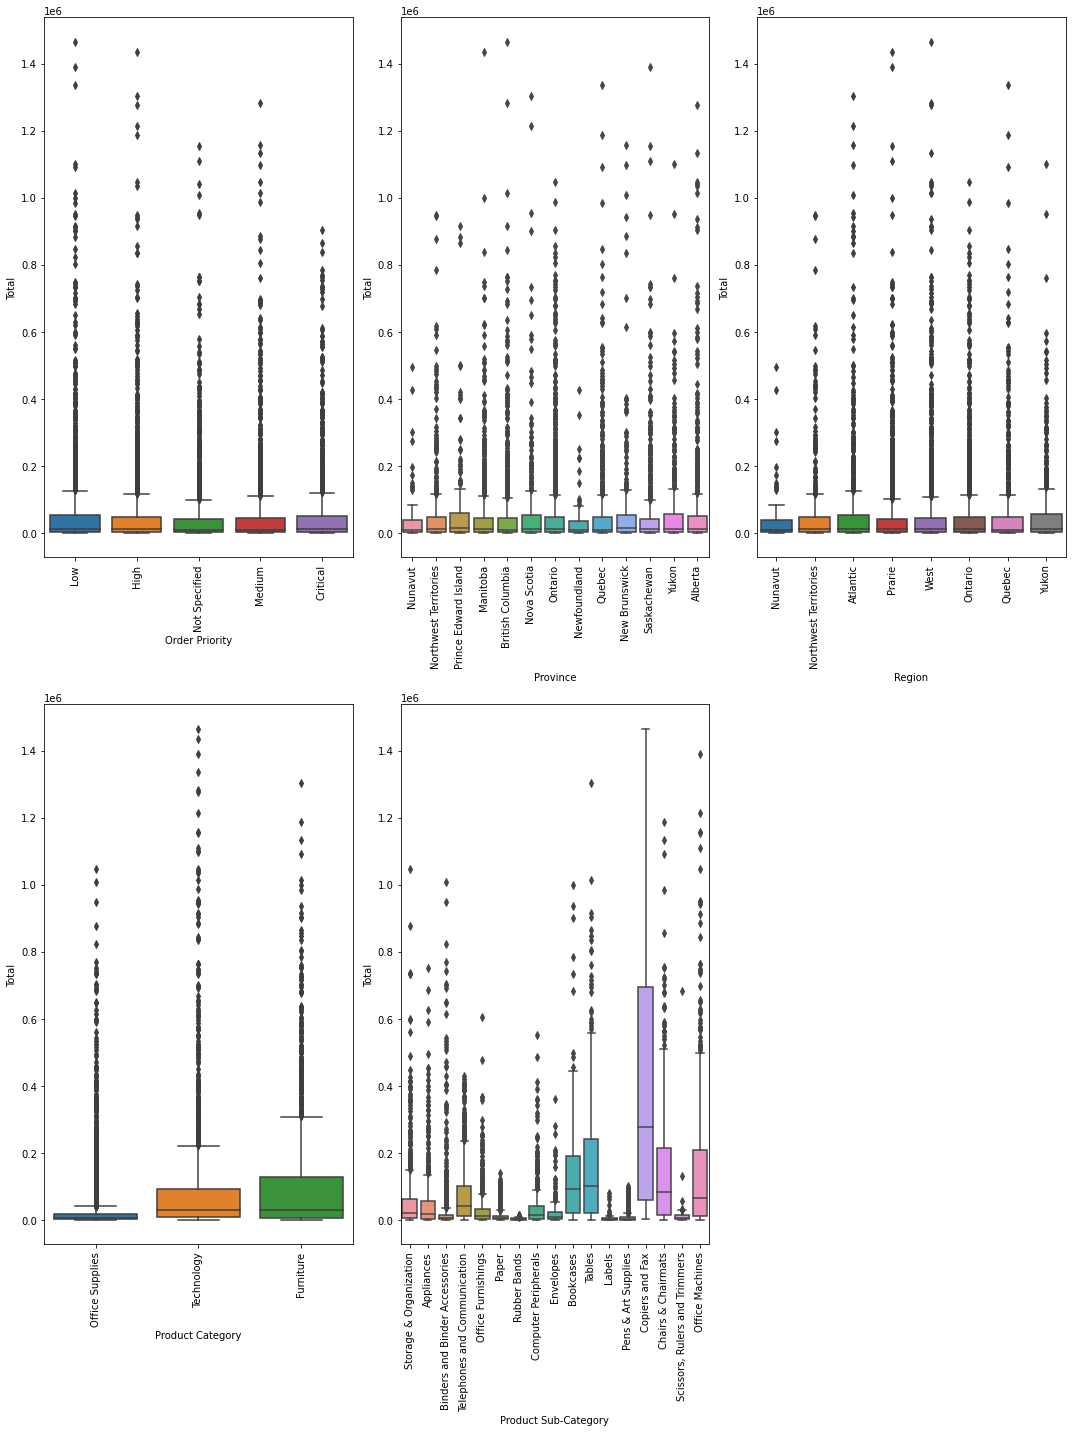

In [29]:
# Based on each categorical features total values in box plot like five point summary to find there any significant 
# difference between the categories in all categorical features
iterator=1

for i in cat_cols1:
    plt.subplot(2,3,iterator)
    plt.xticks(rotation=90)
    sns.boxplot(df[i],df["Total"])
    iterator+=1
plt.tight_layout()
plt.show()

In [30]:
# Creating New Feature 
''' This features created is based on the customer order behaviour in each year'''
customer_consistency = pd.crosstab(index=df["Customer Name"],columns=df["Order Date"].dt.year,values=df["Order ID"],
                                   aggfunc="count")
customer_consistency

Order Date,2009,2010,2011,2012
Customer Name,,,,
Aaron Bergman,2.0,4.0,1.0,NaN
Aaron Hawkins,2.0,2.0,8.0,NaN
Aaron Smayling,11.0,1.0,1.0,1.0
Adam Bellavance,3.0,2.0,5.0,2.0
Adam Hart,4.0,5.0,10.0,8.0
...,...,...,...,...
Vivian Mathis,5.0,4.0,3.0,3.0
William Brown,8.0,7.0,4.0,4.0
Xylona Price,5.0,3.0,3.0,3.0


In [31]:
# Based on the above dataframe converting these to one categorical feature 
lst = []
for i,j in zip(customer_consistency.index,customer_consistency.values): 
    if pd.Series(j).isnull().sum()==2:
        lst.append([i,"Rarely"])
    elif (pd.Series(j).isnull().sum()==3) & (pd.Series(j).isnull()[3]==False):
        lst.append([i,"Newbie"])
    elif pd.Series(j).isnull().sum() == 3:
        lst.append([i,"Old"])
    else:
        lst.append([i,"Consistant"])

In [32]:
# Creating new dataframe to merge the new feature into the original dataset using customer name
customer_consistency = pd.DataFrame(data=lst,columns=["Customer Name","Yr_Customer_Order_Behaviour"])
customer_consistency

,Customer Name,Yr_Customer_Order_Behaviour
0,Aaron Bergman,Consistant
1,Aaron Hawkins,Consistant
2,Aaron Smayling,Consistant
3,Adam Bellavance,Consistant
4,Adam Hart,Consistant
...,...,...
790,Vivian Mathis,Consistant
791,William Brown,Consistant
792,Xylona Price,Consistant
793,Yana Sorensen,Consistant


In [33]:
df = df.merge(customer_consistency,on="Customer Name")
df.head()

,Row ID,Order ID,Order Date,Month Year,Order Priority,Order Quantity,Sales,Customer Name,Province,Region,Product Category,Product Sub-Category,Product Name,Total,Yr_Customer_Order_Behaviour
0,1,3,2010-10-13,2010-10-01,Low,6,261.54,Muhammed MacIntyre,Nunavut,Nunavut,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",1569.24,Consistant
1,1928,13795,2011-04-10,2011-04-01,Not Specified,30,501.32,Muhammed MacIntyre,Northwest Territories,Northwest Territories,Office Supplies,Binders and Binder Accessories,"GBC Pre-Punched Binding Paper, Plastic, White,...",15039.60,Consistant
2,1929,13795,2011-04-10,2011-04-01,Not Specified,23,275.16,Muhammed MacIntyre,Northwest Territories,Northwest Territories,Office Supplies,Paper,Xerox 188,6328.68,Consistant
3,1930,13795,2011-04-10,2011-04-01,Not Specified,37,1302.99,Muhammed MacIntyre,Northwest Territories,Northwest Territories,Office Supplies,Paper,Xerox 1932,48210.63,Consistant
4,2384,17286,2010-09-21,2010-09-01,High,7,1810.67,Muhammed MacIntyre,Northwest Territories,Northwest Territories,Furniture,Chairs & Chairmats,Global Enterprise Series Seating High-Back Swi...,12674.69,Consistant


<AxesSubplot:>

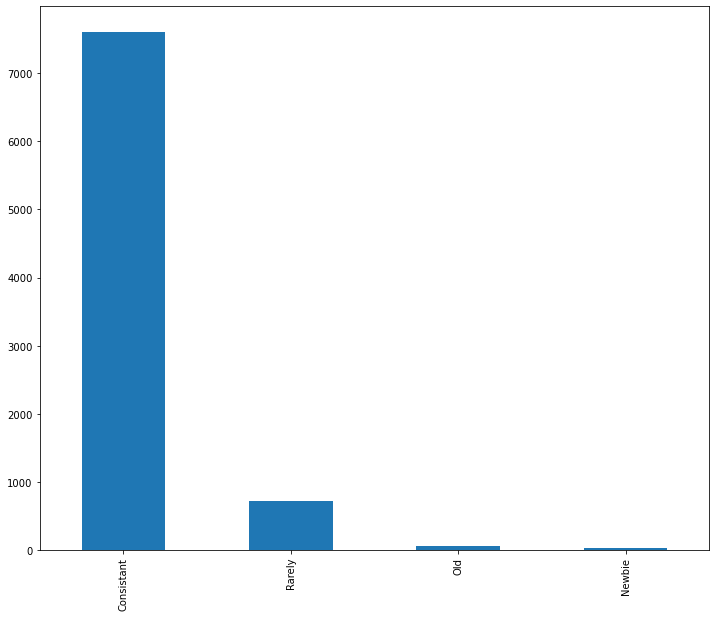

In [112]:
# New Feature categories counts
df["Yr_Customer_Order_Behaviour"].value_counts().plot(kind="bar")

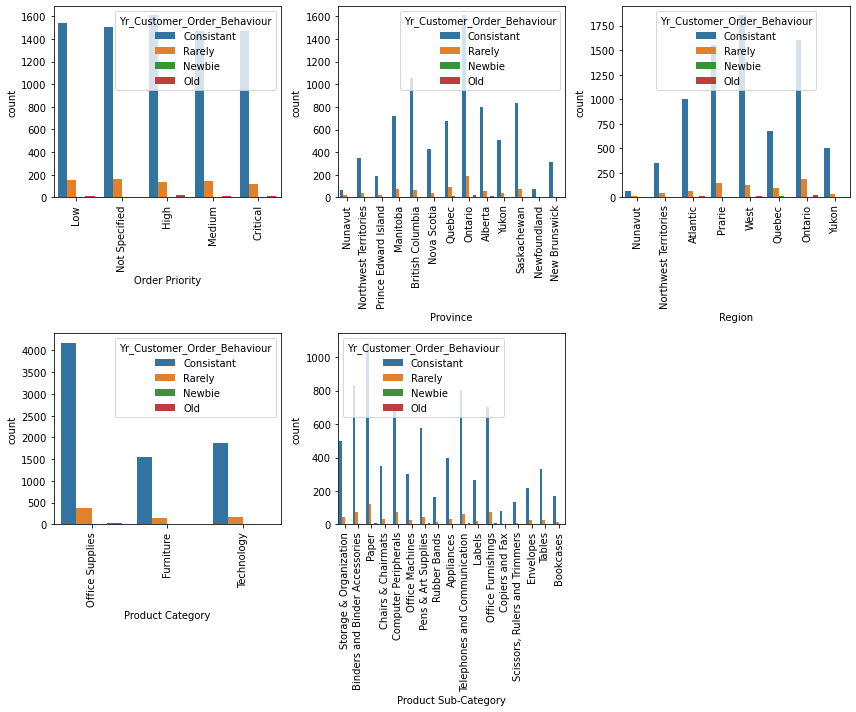

In [113]:
iterator=1

for i in cat_cols1:
    plt.subplot(2,3,iterator)
    plt.xticks(rotation=90)
    sns.countplot(x=df[i],hue=df["Yr_Customer_Order_Behaviour"])
    iterator+=1
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Order Quantity', ylabel='Sales'>

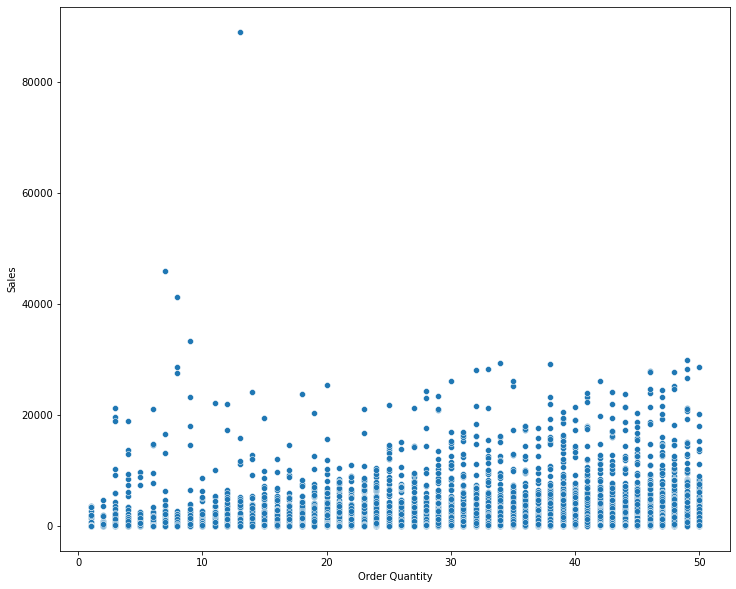

In [117]:
sns.scatterplot(x=df["Order Quantity"],y=df["Sales"])

<AxesSubplot:xlabel='Order Quantity', ylabel='Total'>

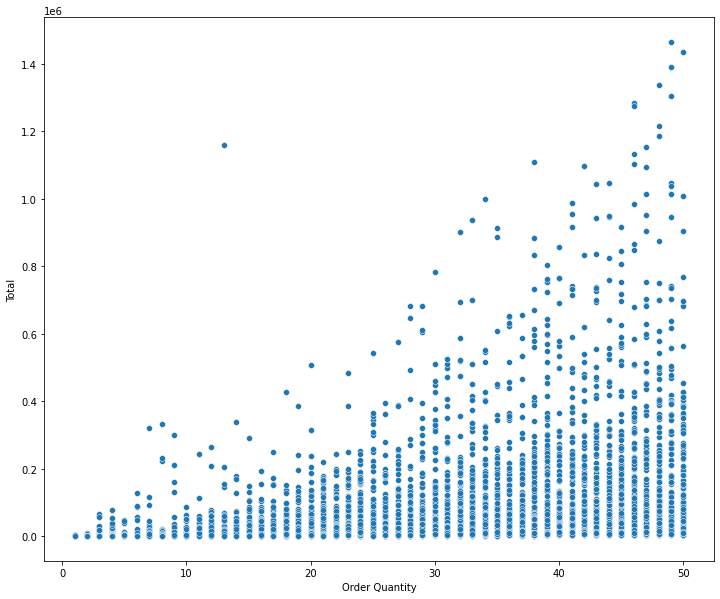

In [118]:
sns.scatterplot(x=df["Order Quantity"],y=df["Total"])

**Based On the above two scatter plots:**
* In this dataset only three numerical features are available.While,it's clearly able to see there is no pattern or shape like a clusters.so,it's hard to make clusters using this numerical features.Defalutly if numerical features are available K means is good ML algorithm to find clusters or Aggloramative clustering technique.But,In this dataset three types of approach can be use
* **Default : Kmeans**
* **RFM Analysis**
* **Kmodes : Particularly for Categorical clustering algorithm**                                                              These are the types of approach is use to find clusters in three ways.

## RFM Analysis

In [38]:
# Recency Calculation
import datetime
df_recency = df.groupby(by='Customer Name',as_index=False)['Order Date'].max() # Fetching Last date of purchase made by each customer
df_recency.columns = ['Customer Name', 'LastPurchase']
recent_date = df_recency['LastPurchase'].max() + datetime.timedelta(days=1) # Getting the max date of purchase in entire date
df_recency['Recency'] = df_recency['LastPurchase'].apply(lambda x: (recent_date - x).days) #calculating each customer days since purchase by 
                                                                                           # subtracting days with recent date
df_recency

,Customer Name,LastPurchase,Recency
0,Aaron Bergman,2011-05-28,583
1,Aaron Hawkins,2011-12-29,368
2,Aaron Smayling,2012-01-19,347
3,Adam Bellavance,2012-10-02,90
4,Adam Hart,2012-12-11,20
...,...,...,...
790,Vivian Mathis,2012-11-06,55
791,William Brown,2012-12-20,11
792,Xylona Price,2012-12-06,25
793,Yana Sorensen,2012-08-20,133


In [39]:
# Calculating frequency orders which is made by each customers
frequency_df = df.groupby(by=['Customer Name'], as_index=False)['Order Date'].count()
frequency_df.columns = ['Customer Name', 'Frequency']
frequency_df

,Customer Name,Frequency
0,Aaron Bergman,7
1,Aaron Hawkins,12
2,Aaron Smayling,14
3,Adam Bellavance,12
4,Adam Hart,27
...,...,...
790,Vivian Mathis,15
791,William Brown,23
792,Xylona Price,14
793,Yana Sorensen,6


In [40]:
# Calculating Total Amounts paid by each customers in last four years in the dataset

monetary_df = df.groupby(by='Customer Name', as_index=False)['Total'].sum()
monetary_df.columns = ['Customer Name', 'Monetary']
monetary_df

,Customer Name,Monetary
0,Aaron Bergman,3.784759e+05
1,Aaron Hawkins,8.146573e+05
2,Aaron Smayling,3.254078e+05
3,Adam Bellavance,4.535234e+05
4,Adam Hart,8.508951e+05
...,...,...
790,Vivian Mathis,9.814101e+05
791,William Brown,1.136634e+06
792,Xylona Price,4.988100e+05
793,Yana Sorensen,5.058117e+04


In [41]:
# After find recency dropping last purchase feature and also merging all three datasets Recency,Freaquency and Monetary together
rfm_df = df_recency.drop("LastPurchase",axis=1).merge(frequency_df,on="Customer Name").merge(monetary_df,on="Customer Name")

In [42]:
# Ranking for each feature in ascending order
rfm_df['R_rank'] = rfm_df['Recency'].rank(ascending=False)
rfm_df['F_rank'] = rfm_df['Frequency'].rank(ascending=True)
rfm_df['M_rank'] = rfm_df['Monetary'].rank(ascending=True)
 
# normalizing the rank of the customers to convert into same scale
rfm_df['R_rank_norm'] = (rfm_df['R_rank']/rfm_df['R_rank'].max())*100
rfm_df['F_rank_norm'] = (rfm_df['F_rank']/rfm_df['F_rank'].max())*100
rfm_df['M_rank_norm'] = (rfm_df['M_rank']/rfm_df['M_rank'].max())*100
 
rfm_df.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)
 
rfm_df.head()

,Customer Name,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,Aaron Bergman,583,7,378475.8600,9.457755,30.943396,43.144654
1,Aaron Hawkins,368,12,814657.3400,20.554855,67.987421,73.333333
2,Aaron Smayling,347,14,325407.8130,22.194199,76.855346,38.364780
3,Adam Bellavance,90,12,453523.3700,68.978562,67.987421,50.817610
4,Adam Hart,20,27,850895.0855,93.316520,98.176101,75.345912


In [43]:
# Calculating RFM Score with the weights for each feature
rfm_df["RFM Score"] = ((10.0*rfm_df["R_rank_norm"]+35.0*rfm_df["F_rank_norm"]+55.0*rfm_df['M_rank_norm'])*0.0005).round(2)

In [44]:
# Sorting the dataset based on frequency and Monetary
rfm_df.sort_values(by=["Frequency","Monetary"],ascending=False)

,Customer Name,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm,RFM Score
198,Darren Budd,47,41,3.332546e+06,83.732661,100.000000,99.874214,4.92
247,Ed Braxton,24,38,2.372311e+06,91.361917,99.874214,98.238994,4.91
99,Brad Thomas,4,35,1.177360e+06,98.423707,99.748428,86.792453,4.62
130,Carlos Soltero,62,33,2.287815e+06,79.192938,99.622642,97.987421,4.83
590,Patrick Jones,51,30,1.127603e+06,82.912989,99.496855,85.660377,4.51
...,...,...,...,...,...,...,...,...
514,Maureen Grace,947,1,1.583152e+05,1.891551,0.440252,19.874214,0.56
671,Sample Company A,425,1,1.142983e+05,16.267339,0.440252,14.968553,0.50
489,Maria Etezadi,1243,1,5.608543e+04,0.252207,0.440252,8.805031,0.25
238,Dorothy Dickinson,969,1,9.309760e+03,1.765448,0.440252,1.257862,0.05


In [45]:
# Segmenting customers based on RFM Score
rfm_df["Customer_segment"] = np.where(rfm_df['RFM Score'] > 4.5, "Top Customers",
                                      (np.where(rfm_df['RFM Score'] > 4,"High value Customer",
                                        (np.where(rfm_df['RFM Score'] > 3,"Medium Value Customer",
                                        np.where(rfm_df['RFM Score'] > 1.6,'Low Value Customers', 
                                                 'Lost Customers'))))))
rfm_df[['Customer Name', 'RFM Score', 'Customer_segment']].head(20)

,Customer Name,RFM Score,Customer_segment
0,Aaron Bergman,1.78,Low Value Customers
1,Aaron Hawkins,3.31,Medium Value Customer
2,Aaron Smayling,2.51,Low Value Customers
3,Adam Bellavance,2.93,Low Value Customers
4,Adam Hart,4.26,High value Customer
5,Adam Shillingsburg,3.04,Medium Value Customer
6,Adrian Barton,0.87,Lost Customers
7,Adrian Hane,0.51,Lost Customers
8,Adrian Shami,1.25,Lost Customers
9,Aimee Bixby,0.68,Lost Customers


In [46]:
rfm_df["Customer_segment"].value_counts()

Low Value Customers      283
Lost Customers           216
Medium Value Customer    188
High value Customer       70
Top Customers             38
Name: Customer_segment, dtype: int64

## K-Means Clustering

In [47]:
# merging rfm dataset with df using Customer name feature

kmeans_df = df.merge(rfm_df,on="Customer Name")

In [48]:
kmeans_df["Customer_segment"].value_counts()

Low Value Customers      2546
Medium Value Customer    2535
High value Customer      1292
Lost Customers           1091
Top Customers             935
Name: Customer_segment, dtype: int64

In [49]:
df["RFM_Segmentation"] = kmeans_df["Customer_segment"]

### Starting to create clusters using K means Algorithmm

In [50]:

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

df_sc = pd.DataFrame(ss.fit_transform(kmeans_df.loc[:,["Order Quantity","Total"]]),columns=["Order Quantity","Total"])
df_sc

,Order Quantity,Total
0,-1.351620,-0.430263
1,0.305815,-0.325444
2,-0.177603,-0.393228
3,0.789233,-0.067324
4,-1.282560,-0.343846
...,...,...
8394,0.651114,-0.354554
8395,-1.282560,-0.401353
8396,-0.177603,-0.427777
8397,0.582054,-0.166882


In [51]:
# importing library to built kmeans ml model with default cluster size
from sklearn.cluster import KMeans

kmeans = KMeans(random_state=10)

model_km = kmeans.fit(df_sc)
model_km.labels_

array([0, 1, 5, ..., 5, 1, 3])

<AxesSubplot:xlabel='Order Quantity', ylabel='Total'>

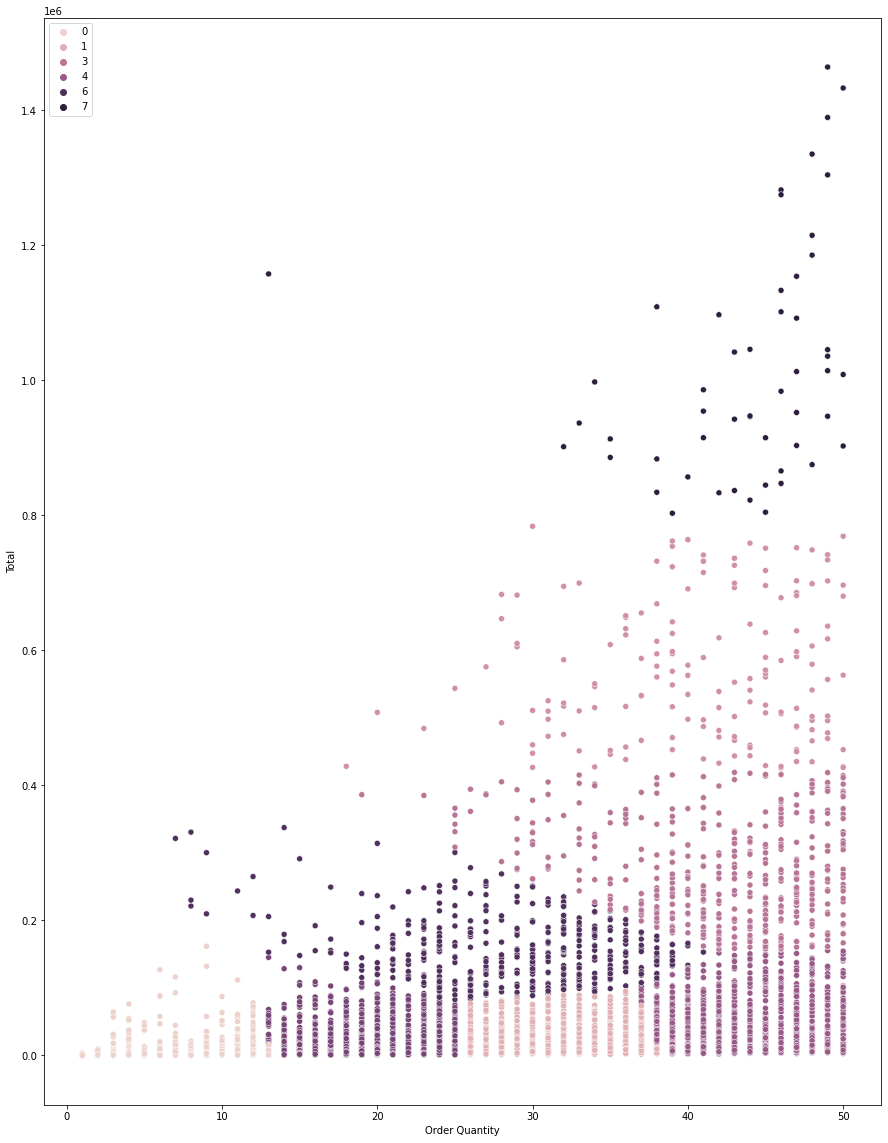

In [52]:
sns.scatterplot(x=kmeans_df["Order Quantity"],y=kmeans_df["Total"],hue=model_km.labels_)

* Based on above plot.It show clusters in a not assigned properly.to find optimal clusters.there are two methods to find it by using elbow plot method and sihoutte score.

In [53]:
### elbow method to find optimal k cluster
iner={}
for k in range(1,7):
    km=KMeans(n_clusters=k,random_state=10)
    km.fit(df_sc)
    iner.update({k:km.inertia_})
iner

{1: 16798.0,
 2: 9525.01111340961,
 3: 4684.767295047872,
 4: 3392.2318818764397,
 5: 2304.8417594019656,
 6: 1864.7493237019562}

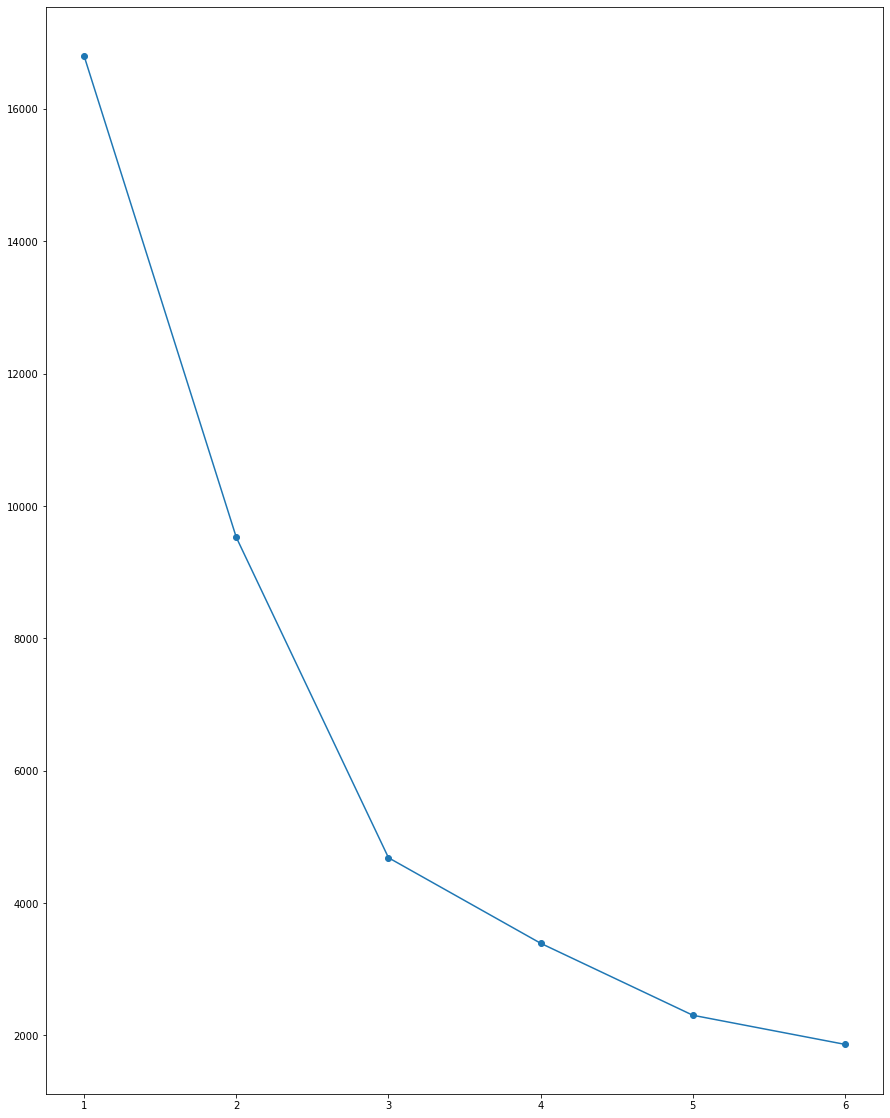

In [54]:
# plotting line graph to find the elbow point
plt.plot(iner.keys(),iner.values(),marker='o')
plt.show()

* Based on the above elbow plot.It say's like 3 is right clusters.

In [55]:
# trying to create new clusters based on the optimal k point got in elbow plot
kmeans = KMeans(n_clusters=3,random_state=10)

model_km_oc = kmeans.fit(df_sc)
model_km_oc.labels_

array([1, 2, 1, ..., 1, 2, 0])

<AxesSubplot:xlabel='Order Quantity', ylabel='Total'>

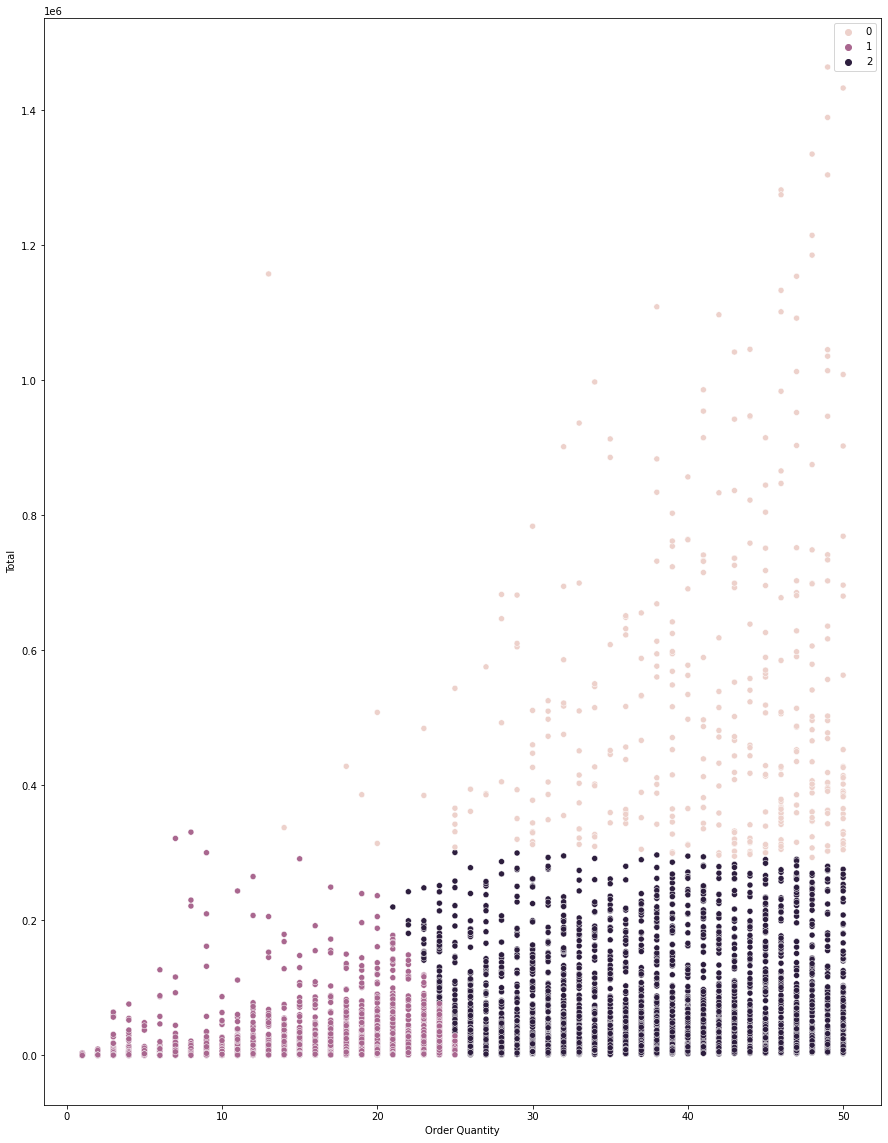

In [56]:
sns.scatterplot(x=kmeans_df["Order Quantity"],y=kmeans_df["Total"],hue=model_km_oc.labels_)

In [57]:
### silhoutte method
from sklearn.metrics import silhouette_score
for k in range(2,7):
    km=KMeans(n_clusters=k,random_state=10)
    km.fit(df_sc)
    sil_score=silhouette_score(df_sc,km.labels_)
    print(f'Silhoutte score for {k} clusters is {sil_score}')

Silhoutte score for 2 clusters is 0.4932952775283525
Silhoutte score for 3 clusters is 0.5397676982145325
Silhoutte score for 4 clusters is 0.5405296825320405
Silhoutte score for 5 clusters is 0.501751448433095
Silhoutte score for 6 clusters is 0.5059530663035839


**Based on sihoutte score there is a point difference between cluster 3 and 4.So,it's easy to classify customers in 3 clusters.**

In [80]:
# trying to create new clusters based on the optimal k point got in silhoutte score
kmeans = KMeans(n_clusters=3,random_state=10)

model_km_oc = kmeans.fit(df_sc)
model_km_oc.labels_

array([1, 2, 1, ..., 1, 2, 0])

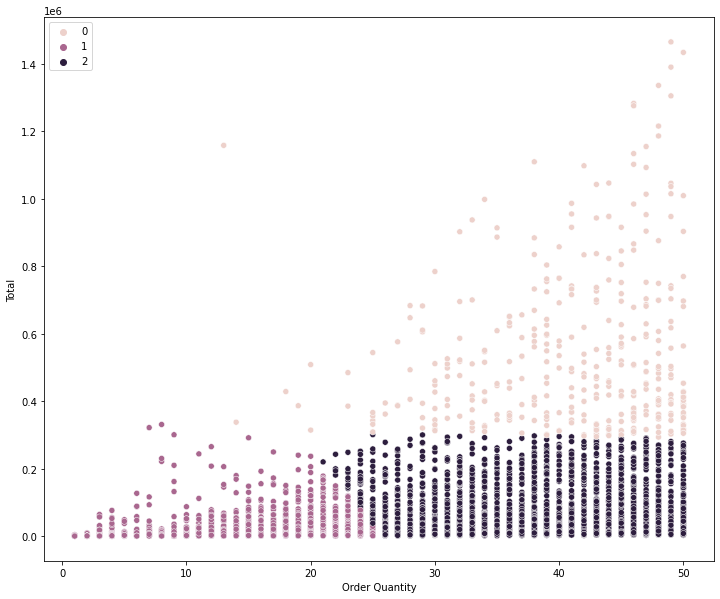

In [115]:
sns.scatterplot(x=kmeans_df["Order Quantity"],y=kmeans_df["Total"],hue=model_km_oc.labels_)
plt.show()

In [83]:
df["Kmeans_segmentation"] = model_km_oc.labels_
df

,Row ID,Order ID,Order Date,Month Year,Order Priority,Order Quantity,Sales,Customer Name,Province,Region,Product Category,Product Sub-Category,Product Name,Total,Yr_Customer_Order_Behaviour,RFM_Segmentation,Kmeans_segmentation,kmode_segmentation
0,1,3,2010-10-13,2010-10-01,Low,6,261.54,Muhammed MacIntyre,Nunavut,Nunavut,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",1569.24,Consistant,Low Value Customers,1,2
1,1928,13795,2011-04-10,2011-04-01,Not Specified,30,501.32,Muhammed MacIntyre,Northwest Territories,Northwest Territories,Office Supplies,Binders and Binder Accessories,"GBC Pre-Punched Binding Paper, Plastic, White,...",15039.60,Consistant,Low Value Customers,2,1
2,1929,13795,2011-04-10,2011-04-01,Not Specified,23,275.16,Muhammed MacIntyre,Northwest Territories,Northwest Territories,Office Supplies,Paper,Xerox 188,6328.68,Consistant,Low Value Customers,1,2
3,1930,13795,2011-04-10,2011-04-01,Not Specified,37,1302.99,Muhammed MacIntyre,Northwest Territories,Northwest Territories,Office Supplies,Paper,Xerox 1932,48210.63,Consistant,Low Value Customers,2,2
4,2384,17286,2010-09-21,2010-09-01,High,7,1810.67,Muhammed MacIntyre,Northwest Territories,Northwest Territories,Furniture,Chairs & Chairmats,Global Enterprise Series Seating High-Back Swi...,12674.69,Consistant,Low Value Customers,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8394,7438,53026,2012-02-26,2012-02-01,Low,35,322.82,Adrian Shami,Alberta,West,Office Supplies,"Scissors, Rulers and Trimmers",Acme® Forged Steel Scissors with Black Enamel ...,11298.70,Consistant,Lost Customers,2,1
8395,7933,56706,2009-11-10,2009-11-01,High,7,754.92,Adrian Shami,Alberta,West,Technology,Office Machines,AT&T 2230 Dual Handset Phone With Caller ID/Ca...,5284.44,Consistant,Lost Customers,1,0
8396,2800,20193,2010-11-07,2010-11-01,Medium,23,82.12,Harry Greene,Alberta,West,Office Supplies,Binders and Binder Accessories,Self-Adhesive Ring Binder Labels,1888.76,Consistant,Low Value Customers,1,1
8397,7396,52706,2012-07-09,2012-07-01,Low,34,1041.66,Harry Greene,Alberta,West,Office Supplies,Binders and Binder Accessories,Lock-Up Easel 'Spel-Binder',35416.44,Consistant,Low Value Customers,2,1


## Kmodes ML clustering technique

In [61]:
# importing library for Kmode ml technique 
from kmodes.kmodes import KModes

k_mode = KModes()

In [62]:
# Choosing Features Only Categories
kmode_df = kmeans_df.loc[:,['Order Priority','Province', 'Region',
       'Product Category', 'Product Sub-Category', 'Product Name',
       'Yr_Customer_Order_Behaviour']]

In [63]:
# Initialize the K-Modes clustering algorithm
km = KModes(n_clusters=4, init='Huang',n_init=5, verbose=1)

# Fit the algorithm to the data
clusters = km.fit_predict(kmode_df)

# Get the cluster centroids
centroids = km.cluster_centroids_

km.labels_

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2429, cost: 32670.0
Run 1, iteration: 2/100, moves: 477, cost: 32670.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 1703, cost: 31679.0
Run 2, iteration: 2/100, moves: 137, cost: 31679.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 1805, cost: 31500.0
Run 3, iteration: 2/100, moves: 376, cost: 31496.0
Run 3, iteration: 3/100, moves: 9, cost: 31496.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 2924, cost: 31380.0
Run 4, iteration: 2/100, moves: 238, cost: 31380.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 1377, cost: 31599.0
Run 5, iteration: 2/100, moves: 253, cost: 31590.0
Run 5, iteration: 3/100, moves: 1, c

array([0, 0, 1, ..., 0, 0, 3], dtype=uint16)

In [64]:
# These are culters centroids
centroids

array([['Low', 'Manitoba', 'Prarie', 'Office Supplies',
        'Binders and Binder Accessories',
        'Wilson Jones Hanging View Binder, White, 1"', 'Consistant'],
       ['Critical', 'British Columbia', 'West', 'Office Supplies',
        'Paper', 'Computer Printout Paper with Letter-Trim Perforations',
        'Consistant'],
       ['Medium', 'Ontario', 'Ontario', 'Furniture',
        'Office Furnishings',
        'Master Giant Foot® Doorstop, Safety Yellow', 'Consistant'],
       ['High', 'Saskachewan', 'Prarie', 'Technology',
        'Telephones and Communication', 'Bell Sonecor JB700 Caller ID',
        'Consistant']], dtype='<U53')

In [65]:
# This process is to find the optimal Clusters
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt

wcss = []
for k in range(1, 9):
    km = KModes(n_clusters=k, init='Huang', n_init=5)
    km.fit_predict(kmode_df)
    wcss.append(km.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 39746.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 39746.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 39746.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 39746.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 39746.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1723, cost: 35792.0
Run 1, iteration: 2/100, moves: 5, cost: 35792.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 1979, cost: 35523.0
Run 2, iteration: 2/

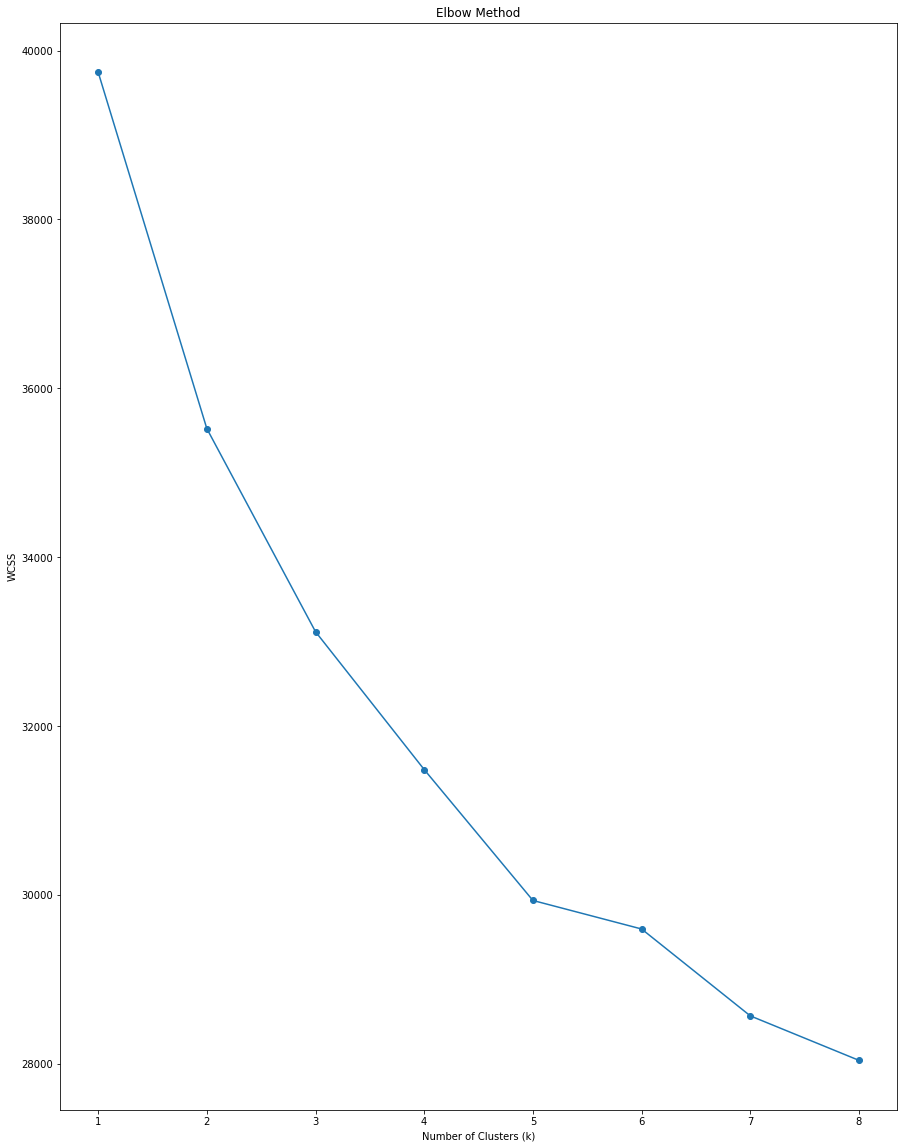

In [66]:
# Elbow plot method to find optimal K points
plt.plot(range(1, 9), wcss,marker="o")
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [67]:
# Initialize the K-Modes clustering algorithm after got the optimal k value
km = KModes(n_clusters=5, init='Huang',n_init=5, verbose=1)

# Fit the algorithm to the data
clusters = km.fit_predict(kmode_df)

# Get the cluster centroids
centroids = km.cluster_centroids_

km.labels_

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 296, cost: 31141.0
Run 1, iteration: 2/100, moves: 680, cost: 30454.0
Run 1, iteration: 3/100, moves: 180, cost: 30454.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 1118, cost: 30562.0
Run 2, iteration: 2/100, moves: 4, cost: 30562.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 8, cost: 31288.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 22, cost: 31674.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 2353, cost: 30674.0
Run 5, iteration: 2/100, moves: 7, cost: 30674.0
Best run was number 1


array([2, 1, 2, ..., 1, 1, 0], dtype=uint16)

In [68]:
# Assigning the the labels to the Dataset
kmode_df["kmode_segmentation"] = km.labels_
kmode_df

,Order Priority,Province,Region,Product Category,Product Sub-Category,Product Name,Yr_Customer_Order_Behaviour,kmode_segmentation
0,Low,Nunavut,Nunavut,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Consistant,2
1,Not Specified,Northwest Territories,Northwest Territories,Office Supplies,Binders and Binder Accessories,"GBC Pre-Punched Binding Paper, Plastic, White,...",Consistant,1
2,Not Specified,Northwest Territories,Northwest Territories,Office Supplies,Paper,Xerox 188,Consistant,2
3,Not Specified,Northwest Territories,Northwest Territories,Office Supplies,Paper,Xerox 1932,Consistant,2
4,High,Northwest Territories,Northwest Territories,Furniture,Chairs & Chairmats,Global Enterprise Series Seating High-Back Swi...,Consistant,0
...,...,...,...,...,...,...,...,...
8394,Low,Alberta,West,Office Supplies,"Scissors, Rulers and Trimmers",Acme® Forged Steel Scissors with Black Enamel ...,Consistant,1
8395,High,Alberta,West,Technology,Office Machines,AT&T 2230 Dual Handset Phone With Caller ID/Ca...,Consistant,0
8396,Medium,Alberta,West,Office Supplies,Binders and Binder Accessories,Self-Adhesive Ring Binder Labels,Consistant,1
8397,Low,Alberta,West,Office Supplies,Binders and Binder Accessories,Lock-Up Easel 'Spel-Binder',Consistant,1


In [84]:
df["kmode_segmentation"] = kmode_df["kmode_segmentation"]
df

,Row ID,Order ID,Order Date,Month Year,Order Priority,Order Quantity,Sales,Customer Name,Province,Region,Product Category,Product Sub-Category,Product Name,Total,Yr_Customer_Order_Behaviour,RFM_Segmentation,Kmeans_segmentation,kmode_segmentation
0,1,3,2010-10-13,2010-10-01,Low,6,261.54,Muhammed MacIntyre,Nunavut,Nunavut,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",1569.24,Consistant,Low Value Customers,1,2
1,1928,13795,2011-04-10,2011-04-01,Not Specified,30,501.32,Muhammed MacIntyre,Northwest Territories,Northwest Territories,Office Supplies,Binders and Binder Accessories,"GBC Pre-Punched Binding Paper, Plastic, White,...",15039.60,Consistant,Low Value Customers,2,1
2,1929,13795,2011-04-10,2011-04-01,Not Specified,23,275.16,Muhammed MacIntyre,Northwest Territories,Northwest Territories,Office Supplies,Paper,Xerox 188,6328.68,Consistant,Low Value Customers,1,2
3,1930,13795,2011-04-10,2011-04-01,Not Specified,37,1302.99,Muhammed MacIntyre,Northwest Territories,Northwest Territories,Office Supplies,Paper,Xerox 1932,48210.63,Consistant,Low Value Customers,2,2
4,2384,17286,2010-09-21,2010-09-01,High,7,1810.67,Muhammed MacIntyre,Northwest Territories,Northwest Territories,Furniture,Chairs & Chairmats,Global Enterprise Series Seating High-Back Swi...,12674.69,Consistant,Low Value Customers,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8394,7438,53026,2012-02-26,2012-02-01,Low,35,322.82,Adrian Shami,Alberta,West,Office Supplies,"Scissors, Rulers and Trimmers",Acme® Forged Steel Scissors with Black Enamel ...,11298.70,Consistant,Lost Customers,2,1
8395,7933,56706,2009-11-10,2009-11-01,High,7,754.92,Adrian Shami,Alberta,West,Technology,Office Machines,AT&T 2230 Dual Handset Phone With Caller ID/Ca...,5284.44,Consistant,Lost Customers,1,0
8396,2800,20193,2010-11-07,2010-11-01,Medium,23,82.12,Harry Greene,Alberta,West,Office Supplies,Binders and Binder Accessories,Self-Adhesive Ring Binder Labels,1888.76,Consistant,Low Value Customers,1,1
8397,7396,52706,2012-07-09,2012-07-01,Low,34,1041.66,Harry Greene,Alberta,West,Office Supplies,Binders and Binder Accessories,Lock-Up Easel 'Spel-Binder',35416.44,Consistant,Low Value Customers,2,1


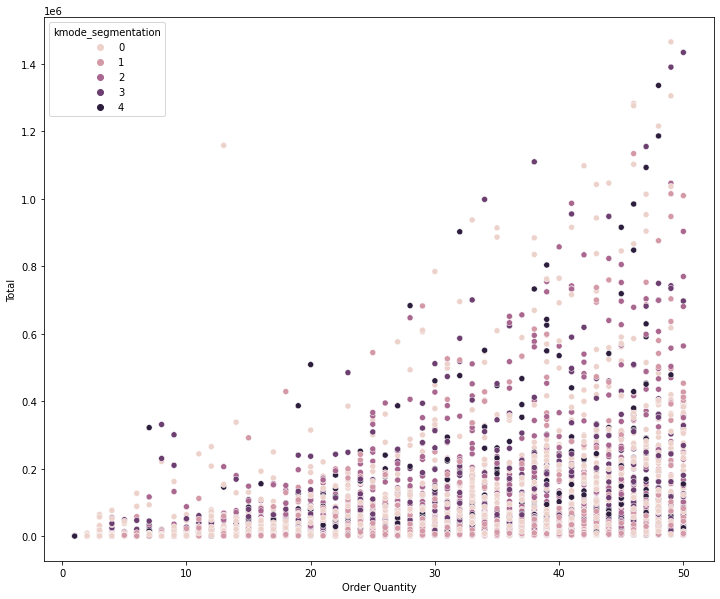

In [116]:
sns.scatterplot(x=df["Order Quantity"],y=df["Total"],hue=df["kmode_segmentation"])
plt.show()

<AxesSubplot:xlabel='Order Quantity', ylabel='Total'>

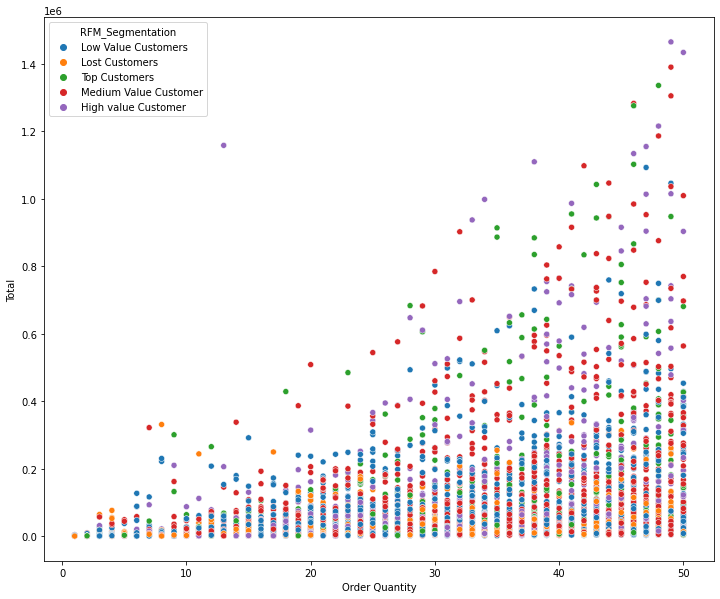

In [86]:
sns.scatterplot(x=df["Order Quantity"],y=df["Total"],hue=df["RFM_Segmentation"])

### A Customer Segmentation cluster created by using Kmeans

<AxesSubplot:xlabel='Order Quantity', ylabel='Total'>

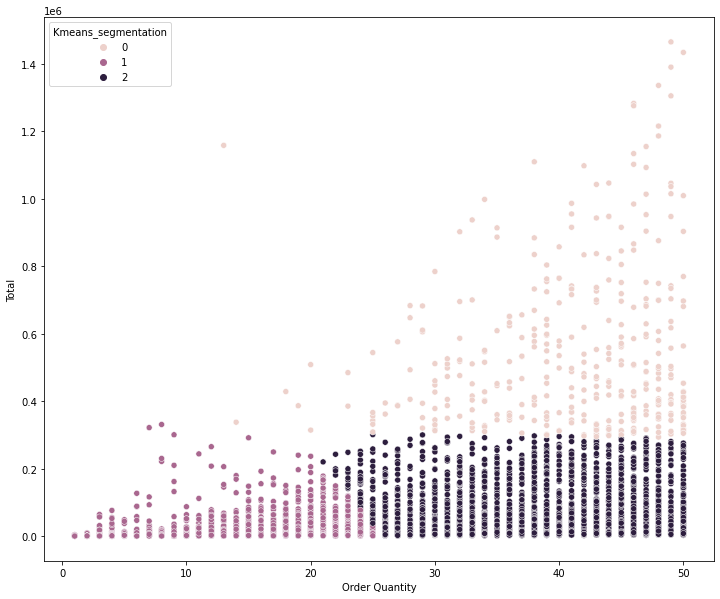

In [87]:
sns.scatterplot(x=df["Order Quantity"],y=df["Total"],hue=df["Kmeans_segmentation"])

### Customer Segmentation clusters created by using method of RFM Analysis

**In Visual Form**

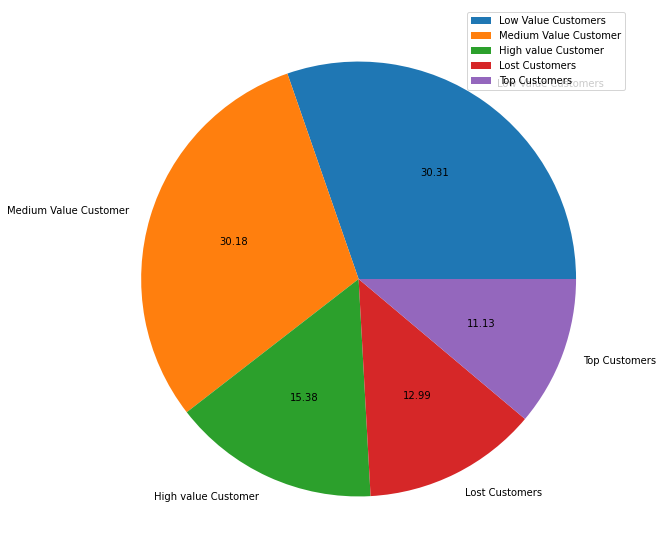

In [88]:
plt.pie(kmeans_df["Customer_segment"].value_counts(),labels=kmeans_df["Customer_segment"].value_counts().index,autopct="%.2f")
plt.legend()
plt.show()

In [119]:
kmeans_df["Customer_segment"].value_counts()

Low Value Customers      2546
Medium Value Customer    2535
High value Customer      1292
Lost Customers           1091
Top Customers             935
Name: Customer_segment, dtype: int64

**In Describe form (Five Point Summary of Each category customers)**
* To understand the clusters.We have to see each clusters Mean value difference and both min & max values.this method will help to understand each customers cluster type.It's the way to understand each clusters in a raw data not in visualizing method.

**Top Customers**

In [89]:
kmeans_df[kmeans_df["Customer_segment"]=="Top Customers"][["Customer Name","Order Quantity",
                                                           "Total","Recency","Frequency","Monetary","RFM Score"]].describe()

,Order Quantity,Total,Recency,Frequency,Monetary,RFM Score
count,935.000000,9.350000e+02,935.000000,935.000000,9.350000e+02,935.000000
mean,27.231016,7.987021e+04,51.632086,25.697326,1.979228e+06,4.708545
std,14.627205,1.690030e+05,41.868682,5.798485,6.464029e+05,0.127469
min,1.000000,4.990000e+00,2.000000,18.000000,1.127603e+06,4.510000
25%,15.000000,3.142650e+03,21.000000,22.000000,1.452944e+06,4.600000
50%,29.000000,1.344271e+04,43.000000,24.000000,1.883854e+06,4.720000
75%,40.000000,6.298629e+04,70.000000,28.000000,2.394657e+06,4.790000
max,50.000000,1.335376e+06,182.000000,41.000000,3.332546e+06,4.920000


**High Value Customers**

In [90]:
kmeans_df[kmeans_df["Customer_segment"]=="High value Customer"][["Customer Name","Order Quantity",
                                                           "Total","Recency","Frequency","Monetary","RFM Score"]].describe()

,Order Quantity,Total,Recency,Frequency,Monetary,RFM Score
count,1292.000000,1.292000e+03,1292.000000,1292.0000,1.292000e+03,1292.000000
mean,25.733746,7.383204e+04,98.263158,19.4613,1.322918e+06,4.284628
std,14.603205,1.674490e+05,84.977924,4.5100,5.574460e+05,0.138542
min,1.000000,3.410000e+00,1.000000,10.0000,7.560156e+05,4.010000
25%,13.000000,2.633100e+03,37.000000,16.0000,9.582396e+05,4.170000
50%,26.000000,1.067806e+04,68.000000,18.0000,1.229269e+06,4.300000
75%,39.000000,5.873721e+04,141.000000,22.0000,1.459271e+06,4.400000
max,50.000000,1.464345e+06,363.000000,29.0000,4.146329e+06,4.500000


**Medium Value Customer**

In [91]:
kmeans_df[kmeans_df["Customer_segment"]=="Medium Value Customer"][["Customer Name","Order Quantity",
                                                           "Total","Recency","Frequency","Monetary","RFM Score"]].describe()

,Order Quantity,Total,Recency,Frequency,Monetary,RFM Score
count,2535.000000,2.535000e+03,2535.000000,2535.000000,2.535000e+03,2535.000000
mean,26.050888,6.356325e+04,162.520316,14.618146,8.200503e+05,3.559314
std,14.646835,1.390093e+05,126.934404,4.119868,2.650953e+05,0.284611
min,1.000000,2.240000e+00,3.000000,6.000000,3.543029e+05,3.010000
25%,13.000000,2.713560e+03,67.000000,12.000000,6.475715e+05,3.330000
50%,26.000000,1.149912e+04,135.000000,14.000000,7.893017e+05,3.610000
75%,39.000000,5.543509e+04,233.000000,17.000000,9.388032e+05,3.820000
max,50.000000,1.389611e+06,646.000000,27.000000,1.841242e+06,4.000000


**Low Value Customer**

In [92]:
kmeans_df[kmeans_df["Customer_segment"]=="Low Value Customers"][["Customer Name","Order Quantity",
                                                           "Total","Recency","Frequency","Monetary","RFM Score"]].describe()

,Order Quantity,Total,Recency,Frequency,Monetary,RFM Score
count,2546.000000,2.546000e+03,2546.000000,2546.000000,2.546000e+03,2546.000000
mean,25.225059,4.742508e+04,221.097408,9.914375,4.027418e+05,2.364446
std,14.101847,9.391573e+04,199.094804,3.001200,1.655375e+05,0.394519
min,1.000000,5.680000e+00,1.000000,3.000000,1.244811e+05,1.610000
25%,13.000000,2.752783e+03,77.000000,8.000000,2.862371e+05,2.040000
50%,25.000000,9.793950e+03,158.000000,10.000000,3.784759e+05,2.360000
75%,37.000000,4.427741e+04,302.000000,11.000000,4.871561e+05,2.710000
max,50.000000,1.092278e+06,1431.000000,20.000000,1.218341e+06,3.000000


**Lost Customer**

In [111]:
kmeans_df[kmeans_df["Customer_segment"]=="Lost Customers"][["Customer Name","Order Quantity",
                                                           "Total","Recency","Frequency","Monetary","RFM Score"]].describe()

,Order Quantity,Total,Recency,Frequency,Monetary,RFM Score
count,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000
mean,23.653529,23502.774002,345.625115,5.920257,128032.029136,1.050147
std,14.484887,42817.122963,259.447160,2.028707,82482.357036,0.396467
min,1.000000,5.060000,1.000000,1.000000,2055.880000,0.030000
25%,11.000000,2012.940000,139.000000,4.000000,63881.050000,0.760000
50%,23.000000,8656.800000,267.000000,6.000000,119830.880000,1.110000
75%,37.000000,23352.756500,510.000000,7.000000,181058.840000,1.380000
max,50.000000,335715.790000,1243.000000,11.000000,416883.510000,1.600000
